# Simple MLP

The goal of this notebook is to better understand gradient descent and backpropagation. The toy example is to create a network that can determine if a 4-digit binary input represents the number 1. For example, [0, 0, 0, 1] should be classified as 1 (True), and [0, 1, 0, 1] should be classified as 0 (False).

## Network Architecture

The network will be a simple Multi-Layer Perceptron (MLP) with the following structure:

- Input Layer: 4 nodes (for our 4-digit binary input)
- Hidden Layer: 2 nodes (enough to learn simple patterns, but small enough for us to calculate by hand)
- Output Layer: 1 node (the probability that the input is the number 1)

For this exercise, the sigmoid activation function for both the hidden and output layers. The sigmoid function is a great choice for learning because it's a non-linear function that squishes any value to a range between 0 and 1. This is perfect for representing a probability at the output.

## Math
Here are the key formulas we'll need.

- Sigmoid function: σ(x) = 1 / (1 + e^(-x))
- Derivative of the sigmoid function: `σ'(x) = σ(x) * (1 - σ(x))`
- Mean Squared Error (MSE) loss: `Loss = (1/n) * Σ(y_true - y_predicted)^2`
  - for our single output, it simplifies to `Loss = (y_true - y_predicted)^2)`
- Derivative of the MSE loss: `d(Loss)/d(y_predicted) = -2 * (y_true - y_predicted)`

In [1]:
# imports
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from typing import List
import random

In [2]:
def sigmoid(x: NDArray[np.float32]):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x: NDArray[np.float32]):
    return x * (1 - x)

In [3]:
# Simple dataset from 0 - 15
dataset = [tuple([int(bit) for bit in list(f"{number:04b}")]) for number in range(2 ** 4)]
# is the number 1?
labels = [(1 if number == 1 else 0,) for number in range(2 ** 4)] 

X_train: NDArray[np.int_] = np.array(dataset[:10])
y_train: NDArray[np.int_] = np.array(labels[:10])

X_test: NDArray[np.int_] = np.array(dataset[10:] + [(0, 0, 0, 1)])
y_test: NDArray[np.int_] = np.array(labels[10:] + [(1,)])

In [4]:
# Initialize weights and biases with some values
# Usually these are random, but we'll set them to make the math easier to follow
weights_hidden = np.array(
    [
        [0.5, 0.2, 0.8, 0.1],
        [0.3, 0.7, 0.4, 0.6],
    ]
)
bias_hidden = np.array(
    [
        [0.2], 
        [0.3],
    ]
)

weights_output = np.array(
    [
        [0.4],
        [0.9],
    ]
)
bias_output = np.array(
    [
        [0.1],
    ]
)


In [5]:
# Training parameters
epochs = 20_000
learning_rate = 0.01
losses: List[float] = [] # To store the loss value at each epoch

In [6]:
for epoch in range(epochs):
    epoch_error = 0
    # print_example = (epoch % 1_000) == 0
    for input_vector, true_output in zip(X_train, y_train):
        # --- Forward pass ---
        # Hidden Layer
        hidden_layer_input = np.dot(weights_hidden, input_vector.reshape(4, 1)) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        # Output Layer
        output_layer_input = np.dot(weights_output.T, hidden_layer_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        # --- Calculate Error ---
        error = true_output - predicted_output
        # Sum of squared error for the epoch
        epoch_error += error ** 2


        # -- Backwards pass --
        # 1. Gradient for the Output Layer
        # We need to find the derivative of the error with respect to the output weights.
        # This tells us how to change the output weights to reduce the error.
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output * weights_output

        # The change we need to make to the output weights
        d_output_weights = np.dot(hidden_layer_output, d_predicted_output.T)
        d_output_bias = np.sum(d_predicted_output, axis=0, keepdims=True)


        # 2. Gradient for the Hidden Layer
        # Now, we do the same for the hidden layer weights.
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        # The change we need to make to the hidden weights
        d_hidden_weights = np.dot(d_hidden_layer, input_vector.reshape(1, 4))
        d_hidden_bias = np.sum(d_hidden_layer, axis=1, keepdims=True)

        # --- Update the Weights ---
        weights_output += d_output_weights * learning_rate
        weights_hidden += d_hidden_weights * learning_rate
        bias_output += d_output_bias * learning_rate
        bias_hidden += d_hidden_bias * learning_rate

        # if print_example:
        #     print(f"Epoch={epoch}")
        #     print(f"\tUsing input_vector={input_vector} and true_input={true_output}")
        #     print(f"\tFound error: {error}")
        #     print(f"\tTotal epoch error: {epoch_error}")
        #     print(f"\td_predicted_output={d_predicted_output}")
        #     print(f"\terror_hidden_layer={error_hidden_layer}")
        #     print(f"\td_output_weights={d_output_weights}")
        #     print(f"\td_output_bias={d_output_bias}")
        #     print(f"\td_hidden_layer={d_hidden_layer}")
        #     print(f"\td_hidden_weights={d_hidden_weights}")
        #     print(f"\td_hidden_bias={d_hidden_bias}")
        #     print(f"\tUpdated Weights (Hidden): {weights_hidden}")
        #     print(f"\tUpdated Weights (Output): {weights_output}")
        #     print_example = False

    # Calculate and store the average loss for the epoch
    average_loss = epoch_error / len(X_train)
    losses.append(average_loss[0][0])
    if (epoch % 100) == 0:
        print(f"Epoch {epoch}, Loss: {average_loss[0][0]:.6f}")

print("\n--- Training Complete ---")
print("Final Weights (Hidden):\n", weights_hidden)
print("\nFinal Weights (Output):\n", weights_output)

Epoch 0, Loss: 0.496583
Epoch 100, Loss: 0.134232
Epoch 200, Loss: 0.099839
Epoch 300, Loss: 0.093018
Epoch 400, Loss: 0.090676
Epoch 500, Loss: 0.089630
Epoch 600, Loss: 0.089080
Epoch 700, Loss: 0.088754
Epoch 800, Loss: 0.088540
Epoch 900, Loss: 0.088387
Epoch 1000, Loss: 0.088268
Epoch 1100, Loss: 0.088168
Epoch 1200, Loss: 0.088079
Epoch 1300, Loss: 0.087996
Epoch 1400, Loss: 0.087916
Epoch 1500, Loss: 0.087838
Epoch 1600, Loss: 0.087759
Epoch 1700, Loss: 0.087679
Epoch 1800, Loss: 0.087598
Epoch 1900, Loss: 0.087515
Epoch 2000, Loss: 0.087429
Epoch 2100, Loss: 0.087341
Epoch 2200, Loss: 0.087249
Epoch 2300, Loss: 0.087155
Epoch 2400, Loss: 0.087057
Epoch 2500, Loss: 0.086956
Epoch 2600, Loss: 0.086852
Epoch 2700, Loss: 0.086744
Epoch 2800, Loss: 0.086631
Epoch 2900, Loss: 0.086515
Epoch 3000, Loss: 0.086395
Epoch 3100, Loss: 0.086270
Epoch 3200, Loss: 0.086141
Epoch 3300, Loss: 0.086007
Epoch 3400, Loss: 0.085868
Epoch 3500, Loss: 0.085724
Epoch 3600, Loss: 0.085575
Epoch 3700, L

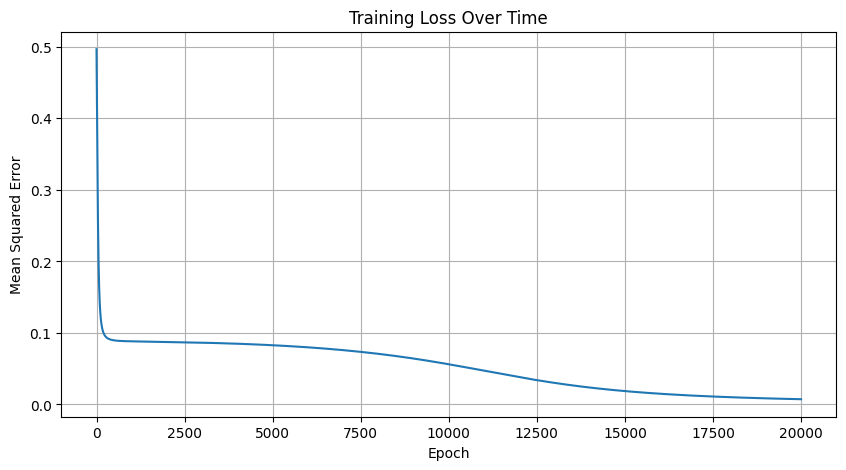

In [ ]:
# --- Visualize the Loss ---
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title("Training Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)

In [8]:
# --- Test Our Trained Model ---
for (test_input, expected_output) in zip(X_test, y_test):
    number = int(''.join(map(str, test_input)), 2)
    hidden_layer_input = np.dot(weights_hidden, test_input.reshape(4, 1)) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(weights_output.T, hidden_layer_output) + bias_output
    predicted_output = sigmoid(output_layer_input)
    print(f"\nPrediction for {number}: {predicted_output[0][0]:.4f} (Correct answer is {expected_output})")



Prediction for 10: 0.0188 (Correct answer is [0])

Prediction for 11: 0.0236 (Correct answer is [0])

Prediction for 12: 0.0200 (Correct answer is [0])

Prediction for 13: 0.0244 (Correct answer is [0])

Prediction for 14: 0.0208 (Correct answer is [0])

Prediction for 15: 0.0230 (Correct answer is [0])

Prediction for 1: 0.7930 (Correct answer is [1])
